In [ ]:
!pip3 install opencv-python
!pip3 install matplotlib
!pip3 install opencv-python-headless matplotlib



Preprocessing done.
Brightness enhancement done.
Brightest areas filtered.
Edge detection done.
RPE contour extraction done.
Interpolation done.


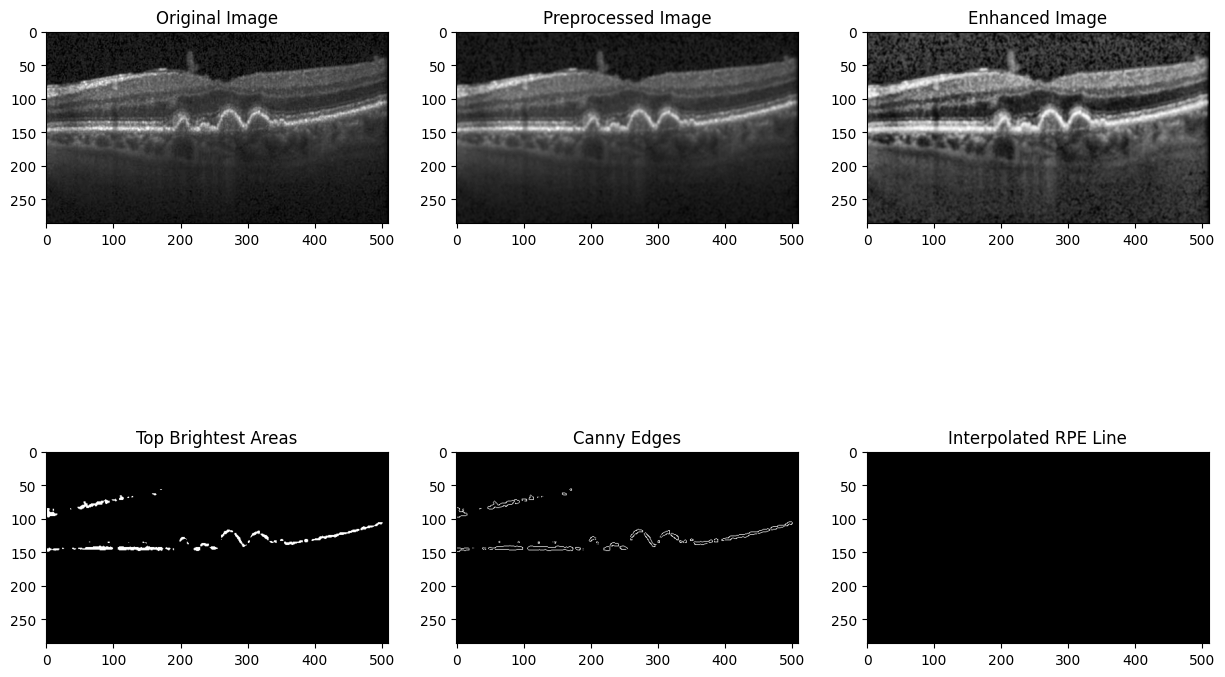

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

# Step 2: Enhance the brightness using CLAHE
def enhance_brightness(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Step 3: Filter the Top Brightest Areas
def filter_brightest_areas(image):
    # Find the threshold value to keep the top 1.5% brightest pixels
    threshold_value = np.percentile(image, 98.5)
    _, brightest_areas = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return brightest_areas

# Step 4: Detect Edges Using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Step 5: Extract the RPE Contour Using Contours
def extract_rpe_contour(image, edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter to get the longest contour spanning the width of the image
    max_length = 0
    rpe_contour = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > max_length and w > image.shape[1] * 0.8:  # Ensure the contour spans most of the image width
            max_length = w
            rpe_contour = contour
    
    return rpe_contour

# Step 6: Interpolate the Contour Points
def interpolate_contour(contour, image_shape):
    if contour is None:
        return np.zeros(image_shape, dtype=np.uint8)
    
    # Extract x and y coordinates from the contour
    x = contour[:, 0, 0]
    y = contour[:, 0, 1]
    
    # Sort the points based on x values
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    # Remove duplicate x values
    x, unique_indices = np.unique(x, return_index=True)
    y = y[unique_indices]
    
    # Interpolate using cubic spline
    cs = CubicSpline(x, y)
    x_new = np.linspace(x.min(), x.max(), num=image_shape[1])
    y_new = cs(x_new).astype(int)
    
    # Create an image with the interpolated line
    interpolated_image = np.zeros(image_shape, dtype=np.uint8)
    for i in range(len(x_new) - 1):
        cv2.line(interpolated_image, (int(x_new[i]), y_new[i]), (int(x_new[i+1]), y_new[i+1]), 255, 2)
    
    return interpolated_image

# Main function
def main(image_path):
    try:
        # Preprocess the image
        original_image, preprocessed_image = preprocess_image(image_path)
        print("Preprocessing done.")
        
        # Enhance brightness
        enhanced_image = enhance_brightness(preprocessed_image)
        print("Brightness enhancement done.")
        
        # Filter the brightest areas
        brightest_areas = filter_brightest_areas(enhanced_image)
        print("Brightest areas filtered.")
        
        # Detect edges
        edges = detect_edges(brightest_areas)
        print("Edge detection done.")
        
        # Extract the RPE contour
        rpe_contour = extract_rpe_contour(enhanced_image, edges)
        print("RPE contour extraction done.")
        
        # Interpolate the RPE contour
        rpe_line_image = interpolate_contour(rpe_contour, preprocessed_image.shape)
        print("Interpolation done.")
        
        # Display all steps
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        axs[0, 0].imshow(original_image, cmap='gray')
        axs[0, 0].set_title('Original Image')
        axs[0, 1].imshow(preprocessed_image, cmap='gray')
        axs[0, 1].set_title('Preprocessed Image')
        axs[0, 2].imshow(enhanced_image, cmap='gray')
        axs[0, 2].set_title('Enhanced Image')
        axs[1, 0].imshow(brightest_areas, cmap='gray')
        axs[1, 0].set_title('Top Brightest Areas')
        axs[1, 1].imshow(edges, cmap='gray')
        axs[1, 1].set_title('Canny Edges')
        axs[1, 2].imshow(rpe_line_image, cmap='gray')
        axs[1, 2].set_title('Interpolated RPE Line')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Path to the OCT image
image_path = '/Users/ammaster10/Documents/Github/Year2/.Research/Data/img_02.jpeg'

# Run the main function and get the extracted brightest line image
main(image_path)


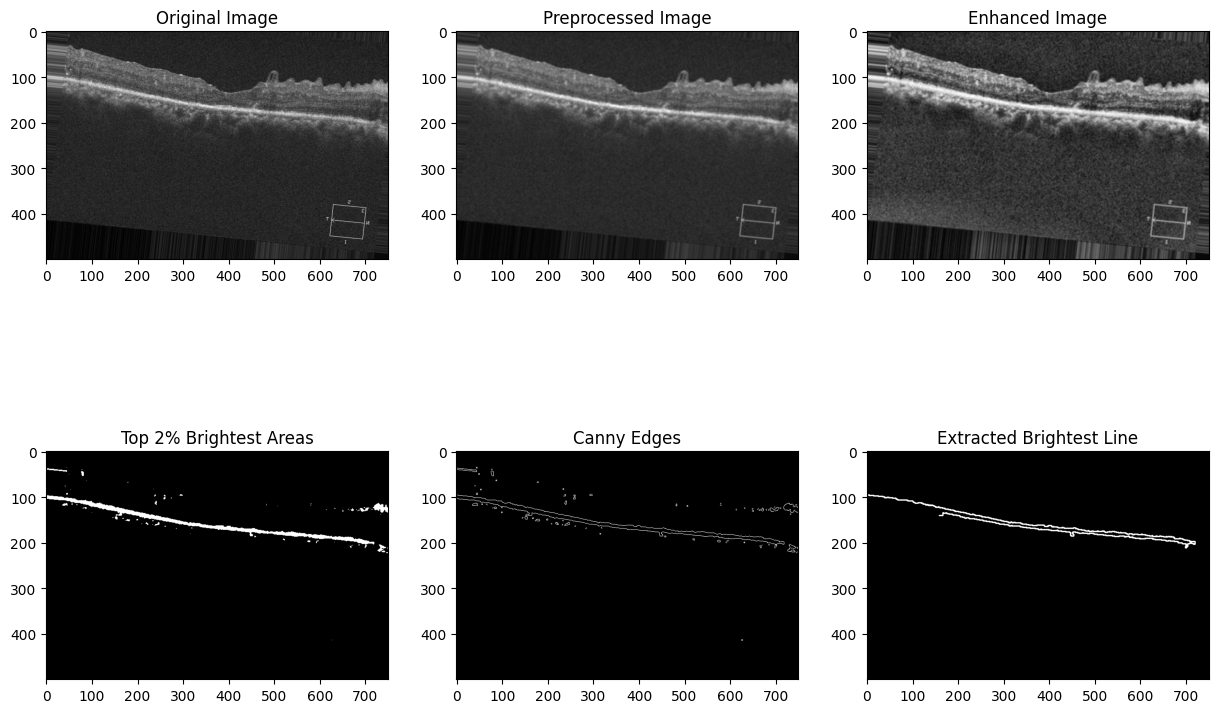

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

# Step 2: Enhance the brightness using CLAHE
def enhance_brightness(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Step 3: Filter the Top 10% Brightest Areas
def filter_brightest_areas(image):
    # Find the threshold value to keep the top 10% brightest pixels
    threshold_value = np.percentile(image, 98)
    _, brightest_areas = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return brightest_areas

# Step 4: Detect Edges Using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Step 5: Extract the Brightest Line Using Contours
def extract_brightest_line(image, edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter to get the longest contour spanning the width of the image
    max_length = 0
    brightest_contour = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > max_length and w > image.shape[1] * 0.8:  # Ensure the contour spans most of the image width
            max_length = w
            brightest_contour = contour
    
    return brightest_contour

# Step 6: Plot the Brightest Line
def plot_brightest_line(image_shape, contour):
    blank_image = np.zeros(image_shape, dtype=np.uint8)
    if contour is not None:
        cv2.drawContours(blank_image, [contour], -1, 255, 2)
    
    return blank_image

# Main function
def main(image_path):
    # Preprocess the image
    original_image, preprocessed_image = preprocess_image(image_path)
    
    # Enhance brightness
    enhanced_image = enhance_brightness(preprocessed_image)
    
    # Filter the top 10% brightest areas
    brightest_areas = filter_brightest_areas(enhanced_image)
    
    # Detect edges
    edges = detect_edges(brightest_areas)
    
    # Extract the brightest line
    brightest_contour = extract_brightest_line(enhanced_image, edges)
    
    # Plot the brightest line
    brightest_line_image = plot_brightest_line(preprocessed_image.shape, brightest_contour)
    
    # Display all steps
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 1].imshow(preprocessed_image, cmap='gray')
    axs[0, 1].set_title('Preprocessed Image')
    axs[0, 2].imshow(enhanced_image, cmap='gray')
    axs[0, 2].set_title('Enhanced Image')
    axs[1, 0].imshow(brightest_areas, cmap='gray')
    axs[1, 0].set_title('Top 2% Brightest Areas')
    axs[1, 1].imshow(edges, cmap='gray')
    axs[1, 1].set_title('Canny Edges')
    axs[1, 2].imshow(brightest_line_image, cmap='gray')
    axs[1, 2].set_title('Extracted Brightest Line')
    plt.show()

# Path to the OCT image
image_path = '/Users/ammaster10/Documents/Github/Year2/.Research/Data/img_02.jpeg'

# Run the main function and get the extracted brightest line image
main(image_path)


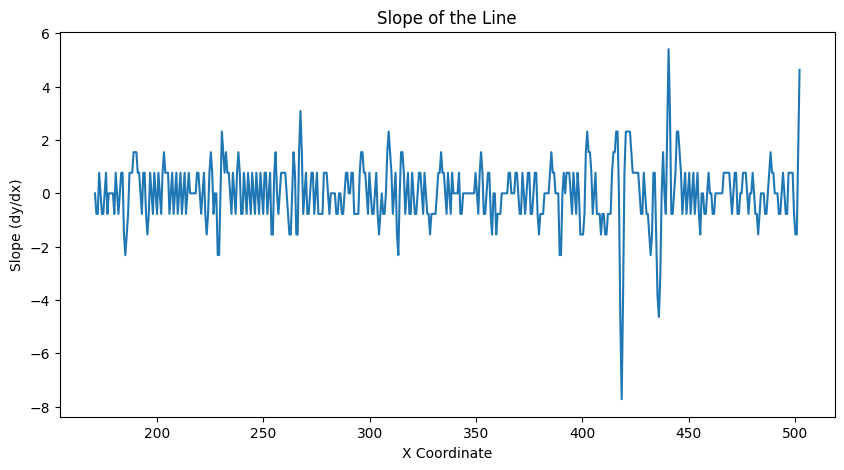

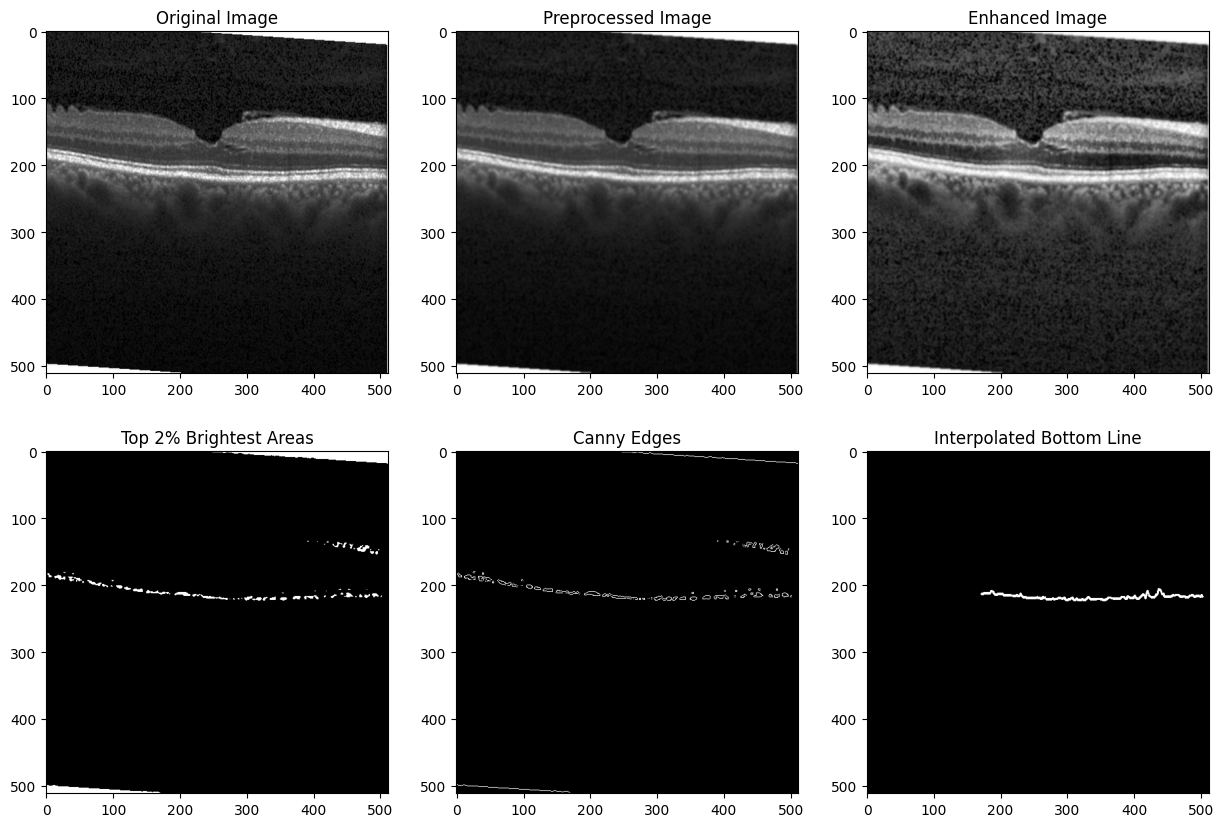

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

# Step 2: Enhance the brightness using CLAHE
def enhance_brightness(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Step 3: Filter the Top 1.5% Brightest Areas
def filter_brightest_areas(image):
    # Find the threshold value to keep the top 1.5% brightest pixels
    threshold_value = np.percentile(image, 98)
    _, brightest_areas = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return brightest_areas

# Step 4: Detect Edges Using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Function to identify and remove outliers using MAD
def remove_outliers(x, y):
    y_median = np.median(y)
    mad = np.median(np.abs(y - y_median))
    threshold = 3 * mad
    non_outliers = np.abs(y - y_median) < threshold
    return x[non_outliers], y[non_outliers]

# Step 5: Extract and Interpolate the Bottom Contour Points
def extract_and_interpolate_bottom_points(edges, image_shape):
    # Initialize arrays to hold the bottom-most points
    bottom_points = []
    height, width = edges.shape

    # Find the bottom-most edge point for each column (x-coordinate)
    for x in range(width):
        column = edges[:, x]
        y_indices = np.where(column > 0)[0]
        if len(y_indices) > 0:
            bottom_y = y_indices[-1]
            bottom_points.append((x, bottom_y))
    
    if not bottom_points:
        return np.zeros(image_shape, dtype=np.uint8), None, None
    
    # Extract x and y coordinates
    x = np.array([pt[0] for pt in bottom_points])
    y = np.array([pt[1] for pt in bottom_points])
    
    # Remove outliers
    x, y = remove_outliers(x, y)
    
    # Interpolate the points using Cubic Spline
    cs_interp = CubicSpline(x, y, extrapolate=True)
    x_new = np.linspace(x.min(), x.max(), num=width)
    y_new = cs_interp(x_new).astype(int)
    
    # Create an image and draw the interpolated line
    interpolated_image = np.zeros(image_shape, dtype=np.uint8)
    for i in range(len(x_new) - 1):
        cv2.line(interpolated_image, (int(x_new[i]), y_new[i]), (int(x_new[i+1]), y_new[i+1]), 255, 2)
    
    return interpolated_image, x_new, y_new

# Step 6: Calculate and Plot the Slope of the Line
def calculate_and_plot_slope(x, y):
    slopes = np.gradient(y, x)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, slopes)
    plt.title('Slope of the Line')
    plt.xlabel('X Coordinate')
    plt.ylabel('Slope (dy/dx)')
    plt.show()

# Main function
def main(image_path):
    """
    Perform image processing and analysis on the given image.

    Parameters:
    image_path (str): The path to the input image file.

    Returns:
    None
    """
    # Preprocess the image
    original_image, preprocessed_image = preprocess_image(image_path)
    
    # Enhance brightness
    enhanced_image = enhance_brightness(preprocessed_image)
    
    # Filter the top 1.5% brightest areas
    brightest_areas = filter_brightest_areas(enhanced_image)
    
    # Detect edges
    edges = detect_edges(brightest_areas)
    
    # Extract and interpolate the bottom points
    interpolated_line_image, x_new, y_new = extract_and_interpolate_bottom_points(edges, preprocessed_image.shape)
    
    # Calculate and plot the slope
    if x_new is not None and y_new is not None:
        calculate_and_plot_slope(x_new, y_new)
    
    # Display all steps
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 1].imshow(preprocessed_image, cmap='gray')
    axs[0, 1].set_title('Preprocessed Image')
    axs[0, 2].imshow(enhanced_image, cmap='gray')
    axs[0, 2].set_title('Enhanced Image')
    axs[1, 0].imshow(brightest_areas, cmap='gray')
    axs[1, 0].set_title('Top 2% Brightest Areas')
    axs[1, 1].imshow(edges, cmap='gray')
    axs[1, 1].set_title('Canny Edges')
    axs[1, 2].imshow(interpolated_line_image, cmap='gray')
    axs[1, 2].set_title('Interpolated Bottom Line')
    plt.show()

# Path to the uploaded image
image_path = '/Users/ammaster10/Documents/Github/Year2/.Research/Data/img_10.jpeg'

main(image_path)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

# Step 2: Enhance the brightness using CLAHE
def enhance_brightness(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Step 3: Filter the Top 1.5% Brightest Areas
def filter_brightest_areas(image):
    # Find the threshold value to keep the top 1.5% brightest pixels
    threshold_value = np.percentile(image, 98)
    _, brightest_areas = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return brightest_areas

# Step 4: Detect Edges Using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Function to identify and remove outliers using MAD
def remove_outliers(x, y):
    y_median = np.median(y)
    mad = np.median(np.abs(y - y_median))
    threshold = 3 * mad
    non_outliers = np.abs(y - y_median) < threshold
    return x[non_outliers], y[non_outliers]

# Step 5: Extract and Interpolate the Bottom Contour Points
def extract_and_interpolate_bottom_points(edges, image_shape):
    # Initialize arrays to hold the bottom-most points
    bottom_points = []
    height, width = edges.shape

    # Find the bottom-most edge point for each column (x-coordinate)
    for x in range(width):
        column = edges[:, x]
        y_indices = np.where(column > 0)[0]
        if len(y_indices) > 0:
            bottom_y = y_indices[-1]
            bottom_points.append((x, bottom_y))
    
    if not bottom_points:
        return np.zeros(image_shape, dtype=np.uint8), None, None
    
    # Extract x and y coordinates
    x = np.array([pt[0] for pt in bottom_points])
    y = np.array([pt[1] for pt in bottom_points])
    
    # Remove outliers
    x, y = remove_outliers(x, y)
    
    # Interpolate the points using Cubic Spline
    cs_interp = CubicSpline(x, y, extrapolate=True)
    x_new = np.linspace(x.min(), x.max(), num=width)
    y_new = cs_interp(x_new).astype(int)
    
    # Create an image and draw the interpolated line
    interpolated_image = np.zeros(image_shape, dtype=np.uint8)
    for i in range(len(x_new) - 1):
        cv2.line(interpolated_image, (int(x_new[i]), y_new[i]), (int(x_new[i+1]), y_new[i+1]), 255, 2)
    
    return interpolated_image, x_new, y_new

# Step 6: Calculate and Plot the Slope of the Line
def calculate_and_plot_slope(x, y):
    slopes = np.gradient(y, x)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, slopes)
    plt.title('Slope of the Line')
    plt.xlabel('X Coordinate')
    plt.ylabel('Slope (dy/dx)')
    plt.show()

# Main function to process multiple images
def process_images(image_paths):
    for image_path in image_paths:
        # Preprocess the image
        original_image, preprocessed_image = preprocess_image(image_path)
        
        # Enhance brightness
        enhanced_image = enhance_brightness(preprocessed_image)
        
        # Filter the top 1.5% brightest areas
        brightest_areas = filter_brightest_areas(enhanced_image)
        
        # Detect edges
        edges = detect_edges(brightest_areas)
        
        # Extract and interpolate the bottom points
        interpolated_line_image, x_new, y_new = extract_and_interpolate_bottom_points(edges, preprocessed_image.shape)
        
        # Calculate and plot the slope
        if x_new is not None and y_new is not None:
            calculate_and_plot_slope(x_new, y_new)
        
        # Display all steps
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        axs[0, 0].imshow(original_image, cmap='gray')
        axs[0, 0].set_title('Original Image')
        axs[0, 1].imshow(preprocessed_image, cmap='gray')
        axs[0, 1].set_title('Preprocessed Image')
        axs[0, 2].imshow(enhanced_image, cmap='gray')
        axs[0, 2].set_title('Enhanced Image')
        axs[1, 0].imshow(brightest_areas, cmap='gray')
        axs[1, 0].set_title('Top 2% Brightest Areas')
        axs[1, 1].imshow(edges, cmap='gray')
        axs[1, 1].set_title('Canny Edges')
        axs[1, 2].imshow(interpolated_line_image, cmap='gray')
        axs[1, 2].set_title('Interpolated Bottom Line')
        plt.show()

# List of image paths to process
image_paths = [
    'Data/img_02.jpeg',
    'Data/img_29.jpeg',
    'Data/img_25.jpeg',
    'Data/img_24.jpeg',
    'Data/img_23.jpeg',
    'Data/img_21.jpeg',
    'Data/img_19.jpeg',
    
    
    
    ]

# /Users/ammaster10/Documents/Github/Year2/.Research/Data/img_29.jpeg
process_images(image_paths)


Preprocessing done.
Brightness enhancement done.
Brightest areas filtered.
Edge detection done.
Brightest line extraction done.
Interpolation done.


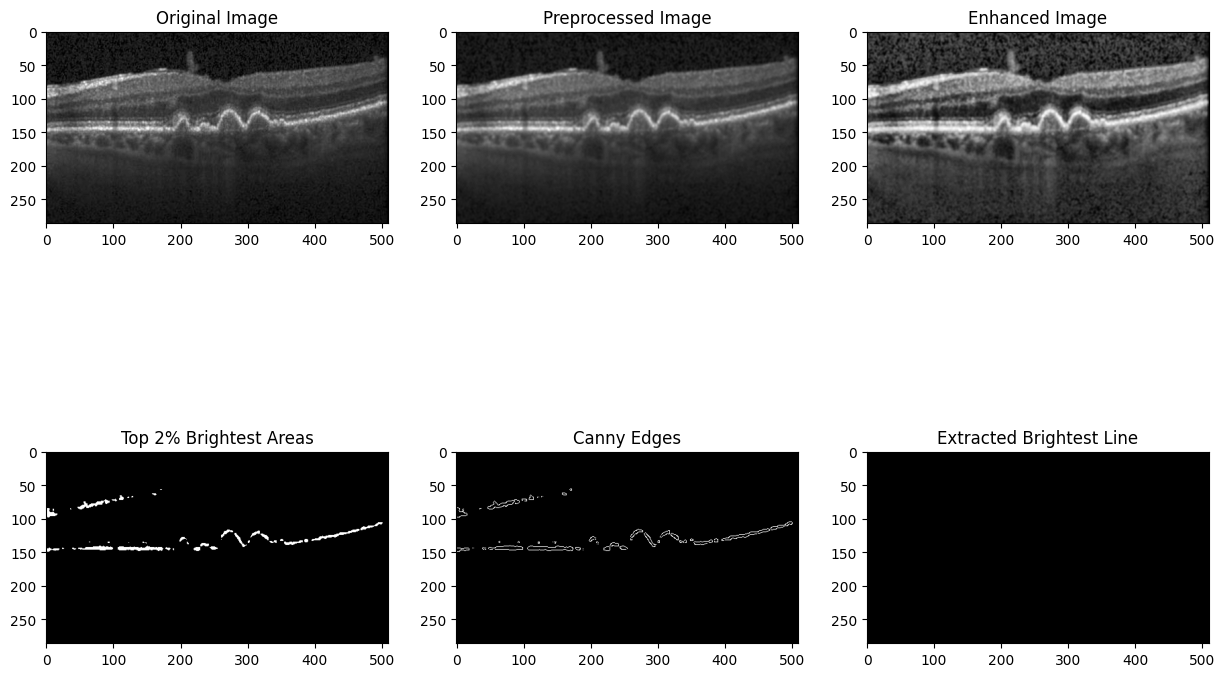

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Step 1: Load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at path {image_path} not found.")
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred_image

# Step 2: Enhance the brightness using CLAHE
def enhance_brightness(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Step 3: Filter the Top 10% Brightest Areas
def filter_brightest_areas(image):
    # Find the threshold value to keep the top 1.5% brightest pixels
    threshold_value = np.percentile(image, 98.5)
    _, brightest_areas = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return brightest_areas

# Step 4: Detect Edges Using Canny Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 50, 150)
    return edges

# Step 5: Extract the Brightest Line Using Contours
def extract_brightest_line(image, edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter to get the longest contour spanning the width of the image
    max_length = 0
    brightest_contour = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > max_length and w > image.shape[1] * 0.8:  # Ensure the contour spans most of the image width
            max_length = w
            brightest_contour = contour
    
    return brightest_contour

# Step 6: Interpolate the Contour Points
def interpolate_contour(contour, image_shape):
    if contour is None:
        return np.zeros(image_shape, dtype=np.uint8)
    
    # Extract x and y coordinates from the contour
    x = contour[:, 0, 0]
    y = contour[:, 0, 1]
    
    # Sort the points based on x values
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    # Remove duplicate x values
    x, unique_indices = np.unique(x, return_index=True)
    y = y[unique_indices]
    
    # Interpolate using cubic spline
    cs = CubicSpline(x, y)
    x_new = np.linspace(x.min(), x.max(), num=image_shape[1])
    y_new = cs(x_new).astype(int)
    
    # Create an image with the interpolated line
    interpolated_image = np.zeros(image_shape, dtype=np.uint8)
    for i in range(len(x_new) - 1):
        cv2.line(interpolated_image, (int(x_new[i]), y_new[i]), (int(x_new[i+1]), y_new[i+1]), 255, 2)
    
    return interpolated_image

# Main function
def main(image_path):
    try:
        # Preprocess the image
        original_image, preprocessed_image = preprocess_image(image_path)
        print("Preprocessing done.")
        
        # Enhance brightness
        enhanced_image = enhance_brightness(preprocessed_image)
        print("Brightness enhancement done.")
        
        # Filter the top 10% brightest areas
        brightest_areas = filter_brightest_areas(enhanced_image)
        print("Brightest areas filtered.")
        
        # Detect edges
        edges = detect_edges(brightest_areas)
        print("Edge detection done.")
        
        # Extract the brightest line
        brightest_contour = extract_brightest_line(enhanced_image, edges)
        print("Brightest line extraction done.")
        
        # Interpolate the brightest line
        brightest_line_image = interpolate_contour(brightest_contour, preprocessed_image.shape)
        print("Interpolation done.")
        
        # Display all steps
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))
        axs[0, 0].imshow(original_image, cmap='gray')
        axs[0, 0].set_title('Original Image')
        axs[0, 1].imshow(preprocessed_image, cmap='gray')
        axs[0, 1].set_title('Preprocessed Image')
        axs[0, 2].imshow(enhanced_image, cmap='gray')
        axs[0, 2].set_title('Enhanced Image')
        axs[1, 0].imshow(brightest_areas, cmap='gray')
        axs[1, 0].set_title('Top 2% Brightest Areas')
        axs[1, 1].imshow(edges, cmap='gray')
        axs[1, 1].set_title('Canny Edges')
        axs[1, 2].imshow(brightest_line_image, cmap='gray')
        axs[1, 2].set_title('Extracted Brightest Line')
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Path to the OCT image
image_path = '/Users/ammaster10/Documents/Github/Year2/.Research/Data/img_02.jpeg'

# Run the main function and get the extracted brightest line image
main(image_path)
